In [16]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv('TSLA.csv', sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
1,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
3,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
4,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800


In [17]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

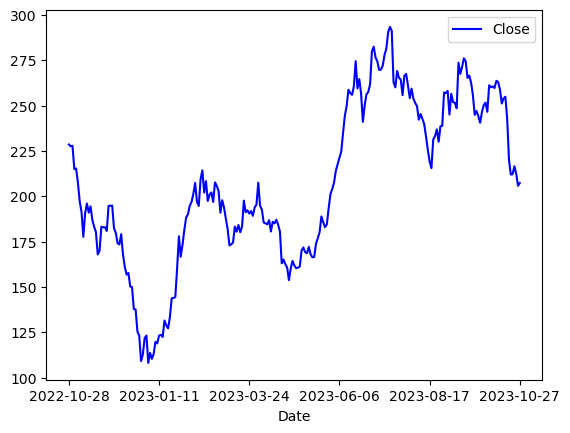

In [18]:
df.plot(x = 'Date', y = 'Close', color= 'blue')

In [19]:
#df=pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y-%m-%d')
#df['Date'] = df['Date'].apply(dt.date.toordinal)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,2022,10,28
1,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,2022,10,31
2,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,2022,11,1
3,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,2022,11,2
4,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,2022,11,3


In [20]:
x = pd.DataFrame(df[['Year', 'Month', 'Day']])  
y = pd.DataFrame(df['Close'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(x_test)  # make predictions
mse = metrics.mean_squared_error(y_test,y_pred)

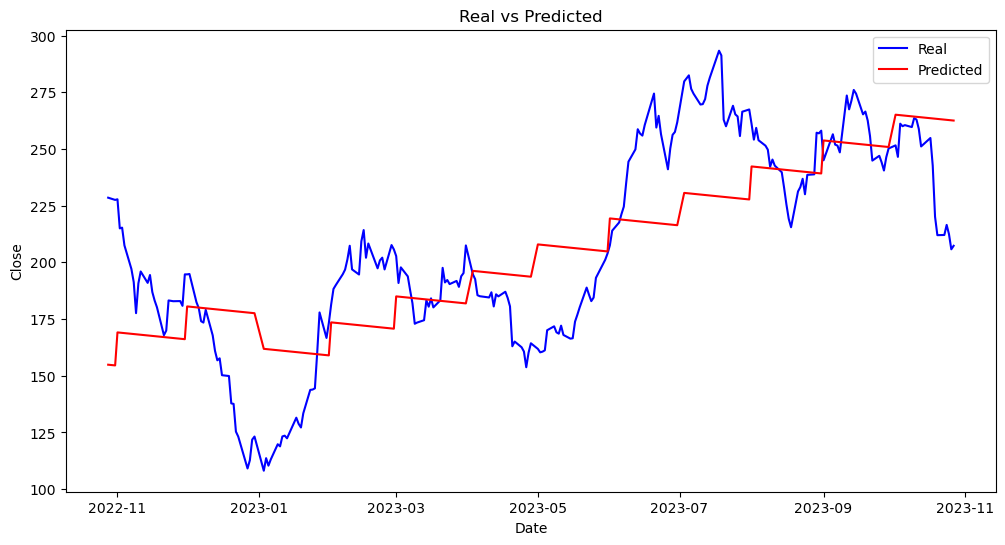

MSE = 704.9572801643915
R-squared (Prediction Percentage Score): 0.6098920989677674


In [22]:
plt.figure(figsize=(12, 6))

# Predicting for the entire dataset
close_pred = linear_regressor.predict(x)

# Plotting the actual values
plt.plot(df['Date'], y, label='Real', color='blue')

# Plotting the predicted values
plt.plot(df['Date'], close_pred, label='Predicted', color='red')

plt.title('Real vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,y_pred)))

# Calculate the R-squared (prediction percentage score)
r_squared = linear_regressor.score(x_test, y_test)
print("R-squared (Prediction Percentage Score):", r_squared)

In [15]:
input_pred = {'Year': [2024], 'Month': [2], 'Day': [14]}
input_df = pd.DataFrame(input_pred)
prediction = linear_regressor.predict(input_df)
print(f"Predicted Close for: {input_pred} , {prediction[0]}")

Predicted Close for: {'Year': [2024], 'Month': [2], 'Day': [14]} , [279.76938985]
